<a href="https://colab.research.google.com/github/HHansi/Machine-Learning-CPD-Course/blob/main/Clustering_Tariff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - K-means Clustering

[Online Tool](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

# Problem

**How can we optimally categorise the tariff for each energy type?**



# Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load Data

In [2]:
# Load the data set
df = pd.read_csv("https://raw.githubusercontent.com/HHansi/Machine-Learning-CPD-Course/main/Data/tariff.csv")
df.head(5)

,homeid,notification_date,provenancedetail,energytype,daily_standing_charge_pence,unit_charge_pence_per_kwh
0,167,8/25/2016,primary_facetoface_initial,electricity,23.02,NaN
1,62,8/26/2016,primary_facetoface_initial,electricity,31.31,NaN
2,62,8/26/2016,primary_facetoface_initial,gas,24.74,NaN
3,61,10/6/2016,primary_facetoface_initial,electricity,0.33,0.12
4,61,10/6/2016,primary_facetoface_initial,gas,0.30,0.33


## Description of the Data Set
As can be seen in the above output (first 5 rows of the data set), this data set consists of 6 columns describing the energy consumption by different houses. 


*   homeid - unique id assigned to each home
*   notification_date - date of notification
*   provenancedetail - provenance tag/name
*   energytype	- type of energy
*   daily_standing_charge_pence
*   unit_charge_pence_per_kwh


(This data set is taken from [IDEAL Household Energy Dataset](https://datashare.ed.ac.uk/handle/10283/3647).)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   homeid                       565 non-null    int64  
 1   notification_date            565 non-null    object 
 2   provenancedetail             565 non-null    object 
 3   energytype                   565 non-null    object 
 4   daily_standing_charge_pence  559 non-null    float64
 5   unit_charge_pence_per_kwh    545 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 26.6+ KB


In [4]:
df.shape

(565, 6)

In [5]:
# get unique energy types in data
df['energytype'].unique()

array(['electricity', 'gas'], dtype=object)

This data set consists of 2 energy types: gas and electricity.

As the initial problem, let's focus on **How can we optimally categorise the tariff for gas?**. We can use K-means clustering algorithm to optimally cluster the values.


# Data Cleaning

In [6]:
# Select important columns
filtered_df = df[['homeid', 'energytype', 'daily_standing_charge_pence']]
filtered_df.head(5)

,homeid,energytype,daily_standing_charge_pence
0,167,electricity,23.02
1,62,electricity,31.31
2,62,gas,24.74
3,61,electricity,0.33
4,61,gas,0.30


In [7]:
# filter rows of energytype = gas
df_gas = filtered_df.loc[df['energytype'] == 'gas']
print(df_gas.shape)
df_gas.head(5)

(284, 3)


,homeid,energytype,daily_standing_charge_pence
2,62,gas,24.74
4,61,gas,0.30
7,64,gas,22.00
8,64,gas,21.00
10,65,gas,3.45


In [8]:
# remove rows and columns with Null/NaN values.
cleaned_df_gas = df_gas.dropna()
cleaned_df_gas.shape

(281, 3)

In [9]:
# remove zeros
cleaned_df_gas = cleaned_df_gas.loc[df['daily_standing_charge_pence'] != 0]
cleaned_df_gas.shape

(269, 3)

In [10]:
cleaned_df_gas.describe()

,homeid,daily_standing_charge_pence
count,269.000000,269.000000
mean,180.550186,21.116729
std,76.260223,7.630907
min,59.000000,0.080000
25%,106.000000,17.000000
50%,183.000000,22.000000
75%,244.000000,26.000000
max,335.000000,60.000000


# EDA

Let's plot a histogram to visualise the distribution of daily_standing_charge_pence corresponding to the energy type of gas.

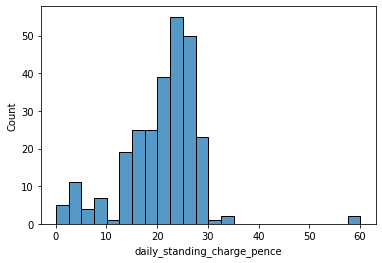

In [11]:
sns.histplot(data=cleaned_df_gas, x='daily_standing_charge_pence', binwidth=2.5)

plt.show()

# K-means clustering

We use [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for K-means clustering experiments.

In [13]:
# To train K-means model, as the input, we need provide X: array-like/sparse matrix of shape (n_samples, n_features).
x = np.array(cleaned_df_gas['daily_standing_charge_pence']).reshape(-1,1)
x.shape

(269, 1)

For K-means clustering, we have to define the number of clusters as a parameter. 

Let's run K-means algorithm with k (number of cluster) = 2, 3, 4, 5

## k=2

In [14]:
kmeans = KMeans(n_clusters=2, random_state=1234)  # create an instance of the class KMeans, giving number of clusters and random state as parameters
kmeans.fit(x)  # train model 
 
# predict assigned cluster labels
labels = kmeans.predict(x)
print(f'predicted clusters:\n {labels}')

predicted clusters:
 [0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0 0]


In [15]:
# get cluster centroids
centroids = kmeans.cluster_centers_
print(f'cluster centroids:\n {centroids}')

cluster centroids:
 [[24.76870466]
 [11.84263158]]


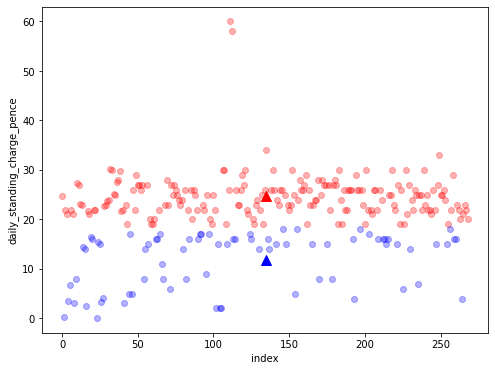

In [18]:
fig = plt.figure(figsize=(8, 6))
colors = ['r', 'b']

# plot data points
for i in range(len(x)):
  plt.plot(i, x[i], color=colors[labels[i]], marker='o', alpha=0.3)

# plot centroids
for n, y in enumerate(centroids):
  plt.plot(len(x)/2, y, marker='^', color=colors[n], ms=10)

plt.xlabel("index")
plt.ylabel("daily_standing_charge_pence")

plt.show()


To support the visualisations, we use index of data points as the x-axis.

## k=3

predicted clusters:
 [0 1 2 2 1 1 2 2 1 1 0 0 0 0 2 2 1 2 2 2 2 2 2 1 2 2 1 1 0 0 0 0 0 0 0 0 0
 0 0 2 2 1 0 2 1 2 1 0 2 0 0 0 0 0 1 2 0 2 2 2 2 2 2 2 2 2 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 2 0 1 2 2 0 2 0 0 2 2 2 2 0 2 1 0 2 2 2 0 2 1 2 1 1 0 0 2 2 0
 0 0 2 2 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 2 2 0 2 0 0 2 2 0 0 0 2 0 0 0 0 2 0
 2 0 2 0 0 0 1 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 1 0 0 0 0 2 0 2 1 0 0 0 2 0 0
 2 0 2 2 0 0 0 2 1 0 0 0 2 0 0 2 0 2 2 2 2 0 0 2 2 0 0 2 2 2 2 0 0 0 0 2 2
 0 2 0 1 2 0 2 0 2 0 2 0 0 1 0 0 2 0 0 0 2 2 2 0 2 2 0 0 0 0 0 0 2 2 2 2 0
 2 2 0 2 2 1 2 0 2 2]

cluster centroids:
 [[26.50421053]
 [ 5.10285714]
 [18.63388889]]



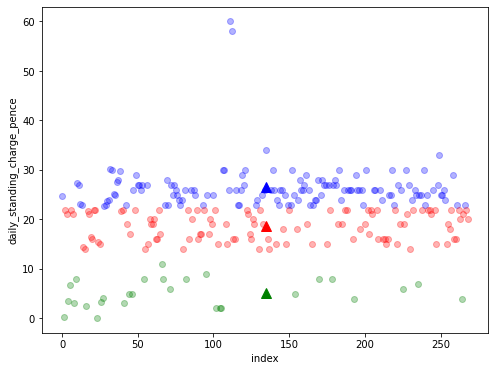

In [19]:
kmeans = KMeans(n_clusters=3, random_state=1234)  # create an instance of the class KMeans, giving number of clusters and random state as parameters
kmeans.fit(x)  # train model 
 
# predict assigned cluster labels
labels = kmeans.predict(x)
print(f'predicted clusters:\n {labels}\n')

# get cluster centroids
centroids = kmeans.cluster_centers_
print(f'cluster centroids:\n {centroids}\n')

fig = plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r']

# plot data points
for i in range(len(x)):
  plt.plot(i, x[i], color=colors[labels[i]], marker='o', alpha=0.3)

# plot centroids
for n, y in enumerate(centroids):
  plt.plot(len(x)/2, y, marker='^', color=colors[n], ms=10)

plt.xlabel("index")
plt.ylabel("daily_standing_charge_pence")
  
plt.show()

## k=4

predicted clusters:
 [0 1 0 2 1 1 0 2 1 1 0 0 0 0 2 2 1 0 2 2 2 0 0 1 2 2 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 2 1 2 1 0 0 0 0 0 0 0 1 2 0 2 2 2 2 2 2 2 0 2 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 2 0 1 0 2 0 2 0 0 0 2 2 2 0 0 1 0 2 2 2 0 0 1 2 1 1 0 0 2 2 0
 3 3 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 2 0 0 2 0 0 2 2 0 0 0 2 0 0 0 0 2 0
 2 0 0 0 0 0 1 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 1 0 0 0 0 2 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 2 1 0 0 0 2 0 0 2 0 0 2 0 2 0 0 0 2 0 0 2 2 2 2 0 0 0 0 0 2
 0 2 0 1 2 0 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 2 2 0 0
 2 2 0 0 2 1 2 0 0 2]

cluster centroids:
 [[25.23679012]
 [ 5.10285714]
 [17.28779221]
 [59.        ]]



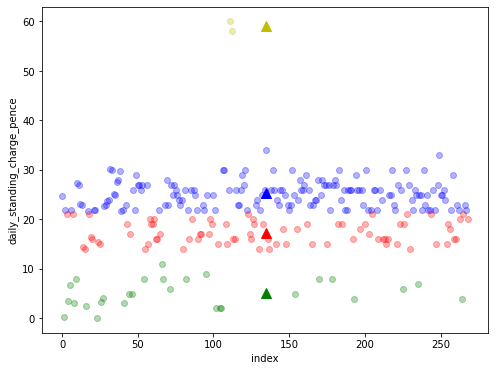

In [20]:
kmeans = KMeans(n_clusters=4, random_state=1234)  # create an instance of the class KMeans, giving number of clusters and random state as parameters
kmeans.fit(x)  # train model 
 
# predict assigned cluster labels
labels = kmeans.predict(x)
print(f'predicted clusters:\n {labels}\n')

# get cluster centroids
centroids = kmeans.cluster_centers_
print(f'cluster centroids:\n {centroids}\n')

fig = plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'y']

# plot data points
for i in range(len(x)):
  plt.plot(i, x[i], color=colors[labels[i]], marker='o', alpha=0.3)

# plot centroids
for n, y in enumerate(centroids):
  plt.plot(len(x)/2, y, marker='^', color=colors[n], ms=10)

plt.xlabel("index")
plt.ylabel("daily_standing_charge_pence")
  
plt.show()

## k=5

predicted clusters:
 [3 1 0 0 1 1 0 0 1 1 3 3 0 0 4 4 1 0 0 4 4 0 0 1 4 4 1 1 0 0 0 0 3 3 3 3 3
 3 3 0 0 1 0 4 1 4 1 3 0 3 3 3 3 3 1 4 3 4 0 4 4 0 4 4 0 4 4 1 0 3 0 1 3 3
 3 3 3 0 0 0 4 3 1 0 4 3 0 3 3 0 4 4 4 0 0 1 3 4 0 4 3 0 1 4 1 1 3 3 4 4 3
 2 2 4 4 3 0 0 3 3 3 3 0 0 4 4 0 4 0 0 4 0 3 4 3 3 4 4 3 3 3 4 0 0 3 3 4 3
 4 0 0 0 3 3 1 4 0 3 3 3 3 3 4 3 0 4 0 0 0 3 1 3 3 3 3 4 3 0 1 3 3 3 4 3 0
 4 3 0 0 3 3 3 4 1 3 3 3 4 3 0 4 3 0 4 0 0 3 3 0 4 3 0 4 4 4 4 3 3 3 0 0 4
 3 4 3 1 4 3 0 3 4 0 0 3 3 1 3 3 0 3 0 3 0 0 0 3 0 4 3 3 3 3 3 0 4 4 4 0 3
 4 4 0 0 0 1 0 0 0 0]

cluster centroids:
 [[22.30469136]
 [ 4.88444444]
 [59.        ]
 [26.97583333]
 [16.4152381 ]]



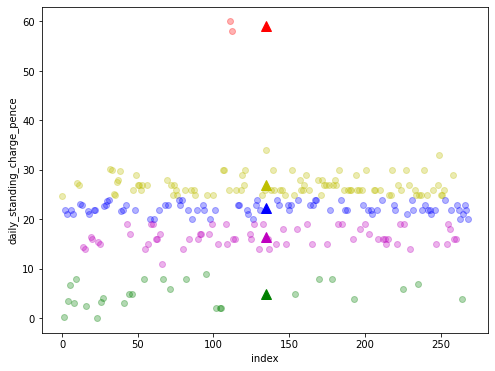

In [21]:
kmeans = KMeans(n_clusters=5, random_state=1234)  # create an instance of the class KMeans, giving number of clusters and random state as parameters
kmeans.fit(x)  # train model 
 
# predict assigned cluster labels
labels = kmeans.predict(x)
print(f'predicted clusters:\n {labels}\n')

# get cluster centroids
centroids = kmeans.cluster_centers_
print(f'cluster centroids:\n {centroids}\n')

fig = plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'y', 'm']

# plot data points
for i in range(len(x)):
  plt.plot(i, x[i], color=colors[labels[i]], marker='o', alpha=0.3)

# plot centroids
for n, y in enumerate(centroids):
  plt.plot(len(x)/2, y, marker='^', color=colors[n], ms=10)

plt.xlabel("index")
plt.ylabel("daily_standing_charge_pence")
  
plt.show()

## Elbow Method

The Elbow Method is one of the most popular methods to determine the optimal value of k.

This runs k-means clustering on the dataset for a range of values for k and then for each value of k computes an average score for all clusters (e.g. within cluster sum of squares). The optimal k can be visually determined when these overall metrics for each model are plotted in a line chart. If the line chart looks like an arm, then the *elbow* is the best value of k. In other words, this is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. 


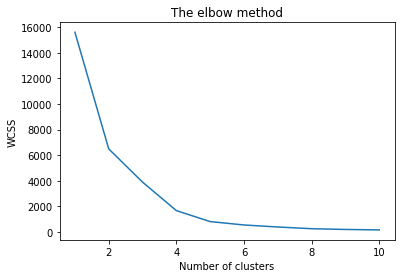

In [22]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=1234)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  # get within cluster sum of squares (squared distances)
    
# Plot the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Looking at the above graph, we can recognise that the optimal k=4.

## Optimal Clusters

predicted clusters:
 [0 1 0 2 1 1 0 2 1 1 0 0 0 0 2 2 1 0 2 2 2 0 0 1 2 2 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 2 1 2 1 0 0 0 0 0 0 0 1 2 0 2 2 2 2 2 2 2 0 2 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 2 0 1 0 2 0 2 0 0 0 2 2 2 0 0 1 0 2 2 2 0 0 1 2 1 1 0 0 2 2 0
 3 3 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 2 0 0 2 0 0 2 2 0 0 0 2 0 0 0 0 2 0
 2 0 0 0 0 0 1 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 1 0 0 0 0 2 0 0 1 0 0 0 2 0 0
 2 0 0 0 0 0 0 2 1 0 0 0 2 0 0 2 0 0 2 0 2 0 0 0 2 0 0 2 2 2 2 0 0 0 0 0 2
 0 2 0 1 2 0 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 2 2 0 0
 2 2 0 0 2 1 2 0 0 2]

cluster centroids:
 [[25.23679012]
 [ 5.10285714]
 [17.28779221]
 [59.        ]]



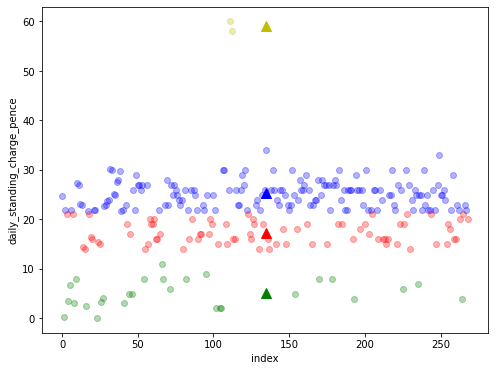

In [23]:
kmeans = KMeans(n_clusters = 4, random_state=1234)  # create an instance of the class KMeans, giving number of clusters and random state as parameters
kmeans.fit(x)  # train model 
 
# predict assigned cluster labels
labels = kmeans.predict(x)
print(f'predicted clusters:\n {labels}\n')

# get cluster centroids
centroids = kmeans.cluster_centers_
print(f'cluster centroids:\n {centroids}\n')

fig = plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'y']

# plot data points
for i in range(len(x)):
  plt.plot(i, x[i], color=colors[labels[i]], marker='o', alpha=0.3)

# plot centroids
for n, y in enumerate(centroids):
  plt.plot(len(x)/2, y, marker='^', color=colors[n], ms=10)

plt.xlabel("index")
plt.ylabel("daily_standing_charge_pence")
  
plt.show()

K-means returns a number as the cluster ID (0, 1, 2, 3). Let's convert them to meaningful names.

To understand the properties of each cluster, we can simply use the cluster centroid values.

| cluster ID  | Centroid  |  Color    |  Name     |
| ----------- | --------: | -------:  | -------:  |
| 0           | 25.2368   | blue (b)  | high      |
| 1           |  5.1029   | green (g) | very low  |
| 2           | 17.2878   | red (r)   | low       |
| 3           | 59.0000   | yellow (y)| very high |

In [24]:
# replace cluster IDs by names
conditions = [labels==0, labels==1, labels==2, labels==3]
choice = ['high', 'very low', 'low', 'very high']

label_names = np.select(conditions, choice)
print(label_names)

['high' 'very low' 'high' 'low' 'very low' 'very low' 'high' 'low'
 'very low' 'very low' 'high' 'high' 'high' 'high' 'low' 'low' 'very low'
 'high' 'low' 'low' 'low' 'high' 'high' 'very low' 'low' 'low' 'very low'
 'very low' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'very low' 'high' 'low' 'very low' 'low'
 'very low' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'very low'
 'low' 'high' 'low' 'low' 'low' 'low' 'low' 'low' 'low' 'high' 'low'
 'very low' 'very low' 'high' 'high' 'high' 'very low' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'low' 'high' 'very low' 'high'
 'low' 'high' 'low' 'high' 'high' 'high' 'low' 'low' 'low' 'high' 'high'
 'very low' 'high' 'low' 'low' 'low' 'high' 'high' 'very low' 'low'
 'very low' 'very low' 'high' 'high' 'low' 'low' 'high' 'very high'
 'very high' 'low' 'low' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'low' 'low' 'low' 'low' 'low' 'high' 'high' 'low' 'high' 'high'
 

In [25]:
# update DataFrame with clusters column
cleaned_df_gas['clusters'] = label_names
cleaned_df_gas.head(5)

,homeid,energytype,daily_standing_charge_pence,clusters
2,62,gas,24.74,high
4,61,gas,0.30,very low
7,64,gas,22.00,high
8,64,gas,21.00,low
10,65,gas,3.45,very low


In [26]:
# save updated DataFrame
cleaned_df_gas.to_csv("/content/tariff_gas_clusters.csv", index=False)